# Chapter 2 - Statistical Learning

## Conceptual

### Question 1
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method.  
  
Justify your answer. 

**(a)** The sample size n is extremely large, and the number of predictors p is small.  
**Answer**: _Flexible Learning Method/Model will perform better._  
**Reason**: _A Flexible Statistical Learning Method/Model is an Overfitting/High Variance Model. Such a model will benefit from a large sample size. If the number of predictors/features is small, that reduces its complexity - and therefore the possibility that it will overfit._  
  
**(b)** The number of predictors p is extremely large, and the number of observations n is small.  
**Answer**: _Flexible Learning Method/Model will perform worse._  
**Reason**: _An overfitting/high variance model will perform worse with a small test sample size. If the number of features/predictors are high, it's complexity is high as well - that increases the possibility that it overfits._

**(c)** The relationship between the predictors and response is highly non-linear.  
**Answer**: _Flexible Learning Method/Model will perform better_  
**Reason**: _An overfitting/high variance/flexible model is more complex, and is better suited to modelling complex relationships._  

**(d)** The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.  
**Answer**: _Flexible Learning Method/Model will perform worse_  
**Reason**: _If ε (i.e. the irreduceable error) has a very high variance, there is a large difference between y and H(X) (as ε = |H(X) - Y|). An overfitting model will perform worse on test data in these conditions_  


### Question 2

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.  

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.  
**Answer:** _This is a Regression problem, and we're interested in Inference. n=500 (only 1 CEO per company), and p=3_  

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.  
**Answer:** _This is a Classification problem, and we're interested in Prediction. n=20 and p=13._  

**(c)** We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.  
**Answer:** _This is a Regression problem, and we're interested in Prediction. n=52 and p=3_.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 3

We now revisit the bias-variance decomposition.  
**(a)** Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.  

**(b)** Explain why each of the five curves has the shape displayed in part (a).  


Text(0, 0.5, 'Error/J(theta)')

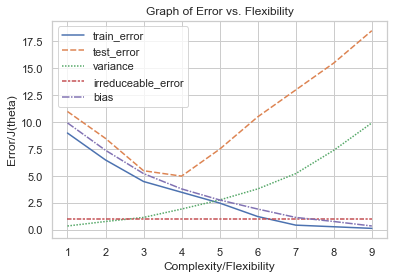

In [3]:
f_flexibility_complexity = list(range(0, 10, 1))
h_test = list((12, 10, 7, 4, 6, 9, 12, 14, 17, 20))
h_train = list((10, 8, 5, 4, 3, 2, 0.5, 0.4, 0.2, 0.1))
variance = h_train[::-1]
for i in range(0, len(variance)):
    variance[i] = variance[i] + np.random.random_sample()
bias = variance[::-1] # simplistic sketch of bias, as being inversely affected by a change in variance
irreduceable_error = np.ones((10), dtype=int)

df = pd.DataFrame(data = {
    'train_error': h_train,
    'test_error': h_test,
    'variance': variance,
    'irreduceable_error': irreduceable_error,
    'bias': bias
}, index=f_flexibility_complexity)

sns.set(style="whitegrid")
ax = sns.lineplot(data=df.rolling(2).mean())
ax.set_title('Graph of Error vs. Flexibility')
ax.set_xlabel('Complexity/Flexibility')
ax.set_ylabel('Error/J(theta)')

* _The Training Error will reduce to almost 0 with a more Flexible model_  
* _The Test Error will start to reduce with a more Flexible model, but will later increase as the model starts to overfit the training data_  
* _The Variance will increase with Flexibility as the model will start to better fit the training data_  
* _The Bias will reduce with Flexibility for the same reason_  
* _The irreduceable error is constant random noise that is inherent in the data_  


### Question 4

You will now think of some real-life applications for statistical learning.

**(a)** Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.  
* _Market Prediction if a Product will be Successful or a Failure. Response Classes: Success/Fail. The Predictors/features are price, product, marketing budget, number of competitors, competitors prices. The goal is Prediction._  

**(b)** Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.  
* _Predict Mpg of a car, based on it's Manufacture year, model, engine capacity, number of cylinders and engine horsepower. Goal is Prediction._  

**(c)** Describe three real-life applications in which cluster analysis might be useful.  
* _Analysis on Tumours - clustering based on proteins in tumours._

### Question 5

What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?  

* _A advantage of a very Flexible model is that it will be able to very closely predict the response based on test data._  
* _The disadvantage of a very Flexible model is if there is a lot of noise or a lot of anomalies in the training data - then the model will overfit the training data, and will not be able to closely predict responses in the test data._  
* _A very Flexible model is preferred in cases where there is a lot of training data samples and the data is not very noisy._  
* _A less Flexible model is preferred in cases where there are not many training data samples and/or there are a lot of extreme values in the training data_

### Question 6

Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a para- metric approach to regression or classification (as opposed to a non- parametric approach)? What are its disadvantages?

### Question 7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

<table>
    <tr><td>Obs.</td><td>X1</td><td>X2</td><td>X3</td><td>Class</td></tr>
    <tr><td>1</td><td>0</td><td>3</td><td>0</td><td>Red</td></tr>
    <tr><td>2</td><td>2</td><td>0</td><td>0</td><td>Red</td></tr>
    <tr><td>3</td><td>0</td><td>1</td><td>3</td><td>Red</td></tr>
    <tr><td>4</td><td>0</td><td>1</td><td>2</td><td>Green</td></tr>
    <tr><td>5</td><td>-1</td><td>0</td><td>1</td><td>Green</td></tr>
    <tr><td>6</td><td>1</td><td>1</td><td>1</td><td>Red</td></tr>
</table>

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.  

(a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0.  
(b) What is our prediction with K = 1? Why?  
_Y is Green - Nearest 1-Neighbour is Green, therefore Y = Green._  

(c) What is our prediction with K = 3? Why?  
_Y is Red - Nearest 3-Neighbours are sample #'s 2(Red), 5(Green) and 6(Red). 2/3 are Red, therefore Y = Red._  

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?  
_The best value for K would be small. If it is large, then the Neighbours size would be quite large and the decision boundary would not capture the right features._  


In [64]:
arr = [{'X1':0, 'X2':3, 'X3':0, 'Class':'Red'},
       {'X1':2, 'X2':0, 'X3':0, 'Class':'Red'},
       {'X1':0, 'X2':1, 'X3':3, 'Class':'Red'},
       {'X1':0, 'X2':1, 'X3':2, 'Class':'Green'},
       {'X1':-1, 'X2':0, 'X3':1, 'Class':'Green'},
       {'X1':1, 'X2':1, 'X3':1, 'Class':'Red'}]
df = pd.DataFrame(arr, columns=['X1','X2','X3','Class'], index=[1,2,3,4,5,6])

df['euc_to_sample'] = pow(pow(df['X1']-0,2) + pow(df['X2']-0,2) + pow(df['X3']-0,2), 0.5)

# If K = 1, What is the Classification of the Test Data Sample Y?
K = 1
classification = df.sort_values(by='euc_to_sample', ascending=True)[0:K]['Class']
print('Classification of Y(X1=X2=X3=0) is ' + classification)

# If K = 3, WHat is the Classification of the Test Data Sample Y?
K = 3
classification = df.sort_values(by='euc_to_sample', ascending=True)[0:K].groupby(['Class']).count().sort_values(['X1'], ascending=False)
classification
#print('Classification of Y(X1=X2=X3=0) is ' + classification)

5    Classification of Y(X1=X2=X3=0) is Green
Name: Class, dtype: object


,X1,X2,X3,euc_to_sample
Class,,,,
Red,2,2,2,2
Green,1,1,1,1


In [40]:
arr = np.array([{'X1':0, 'X2':3, 'X3':0},
              {'X1':1, 'X2':0, 'X3':0}])

arr = [{'X1':0, 'X2':3, 'X3':0},
       {'X1':2, 'X2':0, 'X3':0},
       {'X1':0, 'X2':1, 'X3':3},
       {'X1':0, 'X2':1, 'X3':2},
       {'X1':-1, 'X2':0, 'X3':1},
       {'X1':1, 'X2':1, 'X3':1}]
df = pd.DataFrame(arr, columns=['X1','X2','X3'])
df

,X1,X2,X3
0,0,3,0
1,2,0,0
2,0,1,3
3,0,1,2
4,-1,0,1
5,1,1,1


In [46]:
pow(arr[2]['X3'], 2)
pow(9, 0.5)

3.0

In [32]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])


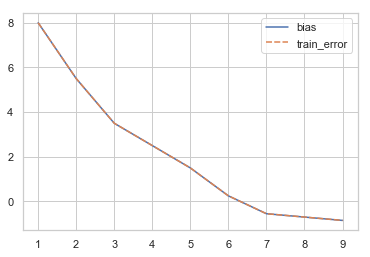

In [118]:
sns.set(style="whitegrid")
sns.lineplot(data=df[['bias','train_error']].rolling(2).mean())

In [88]:
empty = list()
empty

[]

In [148]:
bias

[7.5, 5.5, 2.5, 1.5, 0.5, -0.5, -2.0, -2.1, -2.3, -2.4]

In [139]:
type(bias)

list